# Jonathan Halverson
# Tuesday, March 15, 2016
# Power calculations for a difference of means

### Here we compute the minimum required sample size to be 80% sure that we would detect any practically important effects.

In [140]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

### Here we consider the case of a difference of two means so $H_0: \mu_{\textrm{trmt}} - \mu_{\textrm{ctrl}}=0$ and $H_A: \mu_{\textrm{trmt}} - \mu_{\textrm{ctrl}} \ne 0$

### Let's consider the case where heart attack patients are divided into treatment and control. A drug is given to the treatment group. The idea is to test whether the treatment group has  a different blood pressure than the control group. We are given the standard deviation in each group of 12 mmHg and 100 patients per group. The standard error is then:

In [141]:
SE = np.sqrt(12.0**2 / 100 + 12.0**2 / 100)
print(SE)

1.69705627485


### For $\alpha=0.05$, we would reject $H_0$ outside of $\pm 1.96 SE=3.32$.

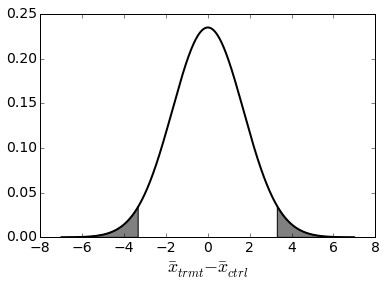

In [142]:
from scipy.stats import norm
moe = 3.32
x = np.arange(-7.0, 7.0, 0.01)
x_left = np.arange(-7.0, -moe, 0.01)
x_right = np.arange(moe, 7.0, 0.01)
y = norm.pdf(x, loc=0.0, scale=SE)
y_left = norm.pdf(x_left, loc=0.0, scale=SE)
y_right = norm.pdf(x_right, loc=0.0, scale=SE)
plt.fill_between(x_left,  0, y_left, facecolor='gray')
plt.fill_between(x_right, 0, y_right, facecolor='gray')
plt.plot(x, y, 'k-', lw=2)
plt.xlabel(r'$\bar{x}_{{trmt}} - \bar{x}_{{ctrl}}$', size=18)

### The gray regions is the plotted above corresponds to where we would reject the null hypothesis. Keep in mind that this is not a standard normal as per usual. Thus one needs to compute a Z-score since the horizontal scale is in units of SE.

### If there is a real effect, and that effect is large enough that it has practical value, then what’s the probability that we detect that effect? This probability is called the power, and we can compute it for different sample sizes or for different effect sizes.

### Suppose that the researchers care about finding any effect on blood pressure that is 3 mmHg or larger vs the standard medication. The minimum effect is then 3 mmHg.

(0, 0.25)

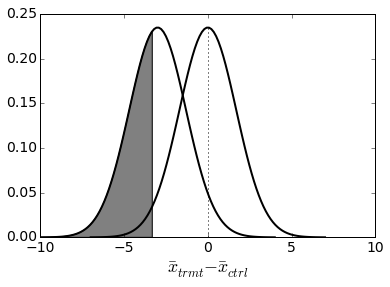

In [143]:
moe = 3.32

x_effect = np.linspace(-10.0, 4.0, num=100)
y_effect = norm.pdf(x_effect, loc=-3.0, scale=SE)

x_left = np.linspace(-7.0 - 3.0, -moe, num=100)
y_left = norm.pdf(x_left, loc=-3.0, scale=SE)

x = np.linspace(-7.0, 7.0, num=100)
y = norm.pdf(x, loc=0.0, scale=SE)

plt.fill_between(x_left,  0, y_left, facecolor='gray')
plt.plot([0, 0], [0, norm.pdf(0, scale=SE)], 'k:')
plt.plot(x, y, 'k-', lw=2)
plt.plot(x_effect, y_effect, 'k-', lw=2)
plt.xlabel(r'$\bar{x}_{{trmt}} - \bar{x}_{{ctrl}}$', size=18)
plt.xlim(-10, 10)
plt.ylim(0, 0.25)

In [144]:
z_score = (-moe - (-3.0)) / SE
norm.cdf(z_score)

0.42521813415617327

### Thus with the given sample size, a minimum effect of 3 mmHg will only be found with probability 0.425. This is the power which is the shaded region above. Let's vary the sample size and example how the power changes. Of course, for larger samples the power will increase:

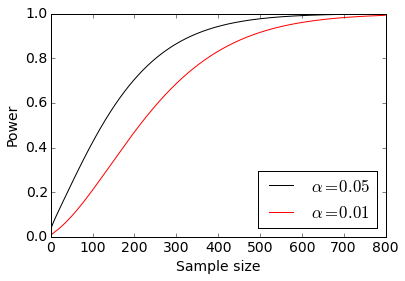

In [145]:
sample_size = range(1, 800)
SE = [np.sqrt(12.0**2 / n + 12.0**2 / n) for n in sample_size]

# alpha = 0.05 which corresponds to 1.96 SE
z_score_05 = [(norm.ppf(0.05 / 2) * s + 3.0) / s for s in SE]
cdf_05 = [norm.cdf(z) for z in z_score_05]
plt.plot(sample_size, cdf_05, 'k-', label=r'$\alpha=0.05$')

# alpha = 0.01 which corresponds to 2.58 SE
z_score_01 = [(norm.ppf(0.01 / 2) * s + 3.0) / s for s in SE]
cdf_01 = [norm.cdf(z) for z in z_score_01]
plt.plot(sample_size, cdf_01, 'r-', label=r'$\alpha=0.01$')

plt.xlabel('Sample size')
plt.ylabel('Power')
plt.legend(loc='lower right')

### To achieve a power of 80% with $\alpha=0.05$, we require a sample size of 252. As the significance level decreases (confidence interval widens), a larger sample is needed to achieve the same power.